In [30]:
from __future__ import absolute_import, division, print_function
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [31]:
print(tf.__version__)

1.13.1


In [32]:
#load mnist data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [33]:
#class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
train_images.shape,train_labels

((60000, 28, 28), array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [37]:
test_images.shape,test_labels.shape

((10000, 28, 28), (10000,))

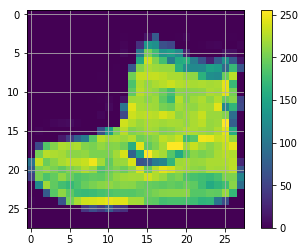

In [48]:
#you must be pre-process before training your network
#if you inspect the first image in the training set
#you will see the pixel values fall in range 0-255
#i will use matplotlib to display the image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [49]:
#scaling or normalize your dataset[0-1]
train_images=train_images/255
test_images=test_images/255

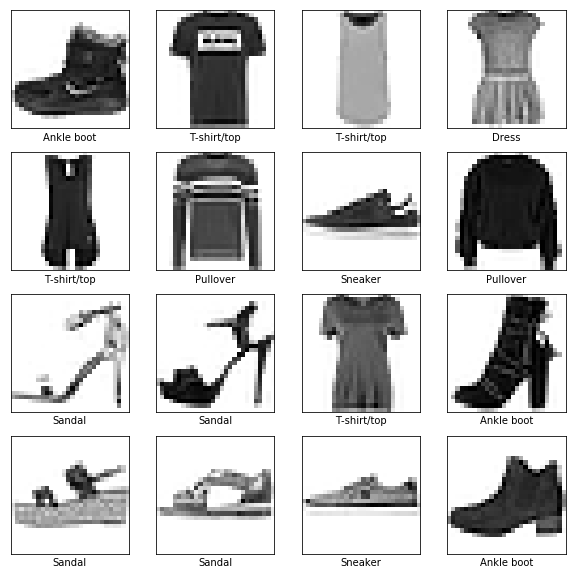

In [52]:
#now i will display first 20 images from training_set 
#display the class name of each images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [54]:
#now i will build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#this layers has no parameter to learn
#it only reformats the data



Instructions for updating:
Colocations handled automatically by placer.


In [55]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2808 - acc: 0.8950
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2694 - acc: 0.9000
Epoch 3/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2569 - acc: 0.9046
Epoch 4/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2469 - acc: 0.9076
Epoch 5/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2408 - acc: 0.9100
Epoch 6/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2324 - acc: 0.9115
Epoch 7/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2243 - acc: 0.9155
Epoch 8/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2163 - acc: 0.9187
Epoch 9/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2102 - acc: 0.9213
Epoch 10/20
60000/60000 [==============================] - 3s 55us/sample - loss: 

In [58]:
#evaluate your accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.3880 - acc: 0.8863
Test accuracy: 0.8863


In [63]:
#predict test_images
predictions=model.predict(test_images)

In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.3880 - acc: 0.8863
Test accuracy: 0.8863


In [67]:
predictions[1]

array([6.2414965e-06, 4.8675601e-20, 9.7832620e-01, 1.4475416e-19,
       2.1545408e-02, 1.3243402e-14, 1.2214437e-04, 9.9939115e-20,
       3.7867913e-16, 1.4259378e-18], dtype=float32)

In [69]:
np.argmax(predictions[1])

2

In [99]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    thisplot[predicted_label].set_color('red')
  else:
    thisplot[predicted_label].set_color('blue')

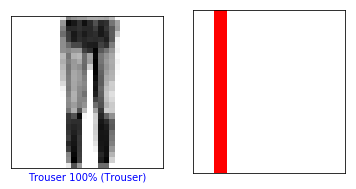

In [100]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()